In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Dataset_T.csv')
data

,PLAN_INTERES,ID,Gender,Age,NIVEL_INTERES,TIPO_PROGRAMA,MODALIDAD,OFRECIO_APOYO,POR_OFERTADO,PROMEDIO,CANAL,"Dirección (binario, U= capital, R=provincia)",Estado Civil,MOTIVO_DESCARTE
0,Especialidad en Innovación,274576,M,44,Especialidad,EN LINEA,Ejecutivo,0,0,72,Digital - Facebook,U,1,Costo
1,Especialidad en Innovación,340962,M,43,Especialidad,EN LINEA,Ejecutivo,1,40,75,Digital - Facebook,U,0,Prefiere presencial
2,Especialidad en Innovación,370676,F,43,Especialidad,EN LINEA,Ejecutivo,1,40,80,Digital - Facebook,U,0,Duración
3,Especialidad en Innovación,420035,M,43,Especialidad,EN LINEA,Ejecutivo,1,40,79,Presencial - Campus,U,1,Eligio otra escuela
4,Especialidad en Innovación,434520,F,30,Especialidad,EN LINEA,Ejecutivo,1,40,77,Digital - Facebook,U,0,Costo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Maestría en Educación,601396,F,32,Maestría,EN LINEA,Ejecutivo,0,0,84,Digital - Facebook,R,1,Costo
145,Maestría en Educación,751888,F,42,Maestría,EN LINEA,Ejecutivo,1,30,85,Presencial - Campus,U,0,Prefiere presencial
146,Maestría en Gestión de Tecnologías de Información,345549,F,34,Maestría,EN LINEA,Ejecutivo,1,40,83,Digital - Google,U,0,Prefiere presencial
147,Maestría en Gestión de Tecnologías de Información,800322,M,41,Maestría,EN LINEA,Ejecutivo,1,50,76,Digital - Facebook,U,1,Duración


In [3]:
data=data.drop(['ID','TIPO_PROGRAMA','MODALIDAD'], axis=1)
data

,PLAN_INTERES,Gender,Age,NIVEL_INTERES,OFRECIO_APOYO,POR_OFERTADO,PROMEDIO,CANAL,"Dirección (binario, U= capital, R=provincia)",Estado Civil,MOTIVO_DESCARTE
0,Especialidad en Innovación,M,44,Especialidad,0,0,72,Digital - Facebook,U,1,Costo
1,Especialidad en Innovación,M,43,Especialidad,1,40,75,Digital - Facebook,U,0,Prefiere presencial
2,Especialidad en Innovación,F,43,Especialidad,1,40,80,Digital - Facebook,U,0,Duración
3,Especialidad en Innovación,M,43,Especialidad,1,40,79,Presencial - Campus,U,1,Eligio otra escuela
4,Especialidad en Innovación,F,30,Especialidad,1,40,77,Digital - Facebook,U,0,Costo
...,...,...,...,...,...,...,...,...,...,...,...
144,Maestría en Educación,F,32,Maestría,0,0,84,Digital - Facebook,R,1,Costo
145,Maestría en Educación,F,42,Maestría,1,30,85,Presencial - Campus,U,0,Prefiere presencial
146,Maestría en Gestión de Tecnologías de Información,F,34,Maestría,1,40,83,Digital - Google,U,0,Prefiere presencial
147,Maestría en Gestión de Tecnologías de Información,M,41,Maestría,1,50,76,Digital - Facebook,U,1,Duración


In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [6]:
labelencoder_X= LabelEncoder()
X[:,0]= labelencoder_X.fit_transform(X[:,0])

In [7]:
X

array([[0, 'M', 44, ..., 'Digital - Facebook', 'U', 1],
       [0, 'M', 43, ..., 'Digital - Facebook', 'U', 0],
       [0, 'F', 43, ..., 'Digital - Facebook', 'U', 0],
       ...,
       [14, 'F', 34, ..., 'Digital - Google', 'U', 0],
       [14, 'M', 41, ..., 'Digital - Facebook', 'U', 1],
       [14, 'M', 42, ..., 'Presencial - Campus', 'U', 0]], dtype=object)

In [8]:
X[:,1]= labelencoder_X.fit_transform(X[:,1])
X

array([[0, 1, 44, ..., 'Digital - Facebook', 'U', 1],
       [0, 1, 43, ..., 'Digital - Facebook', 'U', 0],
       [0, 0, 43, ..., 'Digital - Facebook', 'U', 0],
       ...,
       [14, 0, 34, ..., 'Digital - Google', 'U', 0],
       [14, 1, 41, ..., 'Digital - Facebook', 'U', 1],
       [14, 1, 42, ..., 'Presencial - Campus', 'U', 0]], dtype=object)

In [9]:
X[:,3]= labelencoder_X.fit_transform(X[:,3])
X

array([[0, 1, 44, ..., 'Digital - Facebook', 'U', 1],
       [0, 1, 43, ..., 'Digital - Facebook', 'U', 0],
       [0, 0, 43, ..., 'Digital - Facebook', 'U', 0],
       ...,
       [14, 0, 34, ..., 'Digital - Google', 'U', 0],
       [14, 1, 41, ..., 'Digital - Facebook', 'U', 1],
       [14, 1, 42, ..., 'Presencial - Campus', 'U', 0]], dtype=object)

In [10]:
X[:,7]= labelencoder_X.fit_transform(X[:,7])
X

array([[0, 1, 44, ..., 1, 'U', 1],
       [0, 1, 43, ..., 1, 'U', 0],
       [0, 0, 43, ..., 1, 'U', 0],
       ...,
       [14, 0, 34, ..., 2, 'U', 0],
       [14, 1, 41, ..., 1, 'U', 1],
       [14, 1, 42, ..., 3, 'U', 0]], dtype=object)

In [11]:
X[:,8]= labelencoder_X.fit_transform(X[:,8])
X

array([[0, 1, 44, ..., 1, 1, 1],
       [0, 1, 43, ..., 1, 1, 0],
       [0, 0, 43, ..., 1, 1, 0],
       ...,
       [14, 0, 34, ..., 2, 1, 0],
       [14, 1, 41, ..., 1, 1, 1],
       [14, 1, 42, ..., 3, 1, 0]], dtype=object)

In [12]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,7,8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
X

array([[1.0, 0.0, 0.0, ..., 0, 72, 1],
       [1.0, 0.0, 0.0, ..., 40, 75, 0],
       [1.0, 0.0, 0.0, ..., 40, 80, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 40, 83, 0],
       [0.0, 0.0, 0.0, ..., 50, 76, 1],
       [0.0, 0.0, 0.0, ..., 45, 74, 0]], dtype=object)

In [27]:
le = LabelEncoder()
y = le.fit_transform(y)

y

ValueError: Expected 2D array, got 1D array instead:
array=[0. 4. 1. 2. 0. 0. 1. 4. 0. 1. 0. 2. 1. 3. 4. 4. 2. 1. 0. 3. 3. 0. 0. 2.
 1. 0. 0. 0. 3. 0. 0. 0. 0. 4. 0. 3. 0. 1. 0. 1. 1. 4. 0. 1. 0. 4. 1. 3.
 0. 3. 1. 3. 3. 3. 3. 3. 2. 0. 1. 1. 1. 3. 4. 1. 1. 0. 0. 0. 1. 3. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 4. 2. 3. 3. 2. 2. 4. 0. 2. 3. 3. 1. 1. 2. 0. 3. 0.
 4. 0. 4. 1. 4. 1. 3. 1. 0. 0. 0. 1. 4. 3. 3. 1. 4. 3. 3. 4. 0. 3. 1. 2.
 0. 1. 3. 2. 3. 2. 1. 0. 0. 1. 0. 1. 0. 3. 3. 1. 3. 3. 1. 0. 4. 2. 0. 0.
 0. 4. 4. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [82]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 3, 3, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0, 0, 1, 3, 1, 1, 0, 0, 1,
       3, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 3])

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[4 7 0 0 0]
 [5 2 0 2 0]
 [0 1 0 2 0]
 [0 5 0 3 0]
 [2 4 0 1 0]]


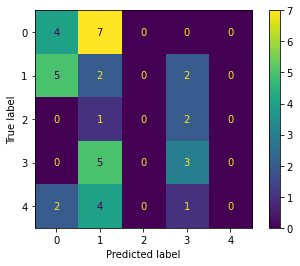

In [84]:
plot_confusion_matrix(classifier, X_test, y_test)  
>>> plt.show()  

## Regresión polinómica multiple, análasis de variables

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [96]:
X2= np.array(X, dtype=float)

In [97]:
import statsmodels.api as sm
#Para utilizar la librería de Statsmodels, se requiere la columna de 1 que se agregará abajo
#El código de abajo es para agregar una fila de 1 al principio de x 
X= np.append(arr= np.ones((149,1)).astype(int),values = X, axis=1) 
#axis=1 es para que se añada en columna // axis=0 sería para agregar en fila

#crear variable que se quede con las variables que realmente tienen impacto
#en el resultado final de la regresión
SL=0.05
X_opt = X2[:, [0,1,2,3,4,5,6,7,8,9]]
regressor_OLS = sm.OLS(endog=y,exog=X2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.129
Date:                Sun, 20 Jun 2021   Prob (F-statistic):              0.323
Time:                        20:08:50   Log-Likelihood:                -248.80
No. Observations:                 149   AIC:                             547.6
Df Residuals:                     124   BIC:                             622.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4169      0.390      1.070      0.287      -0.355       1.188
x1             0.4169      0.390      1.070      0.287      -0.355       1.188
x2             0.4169      0.390      1.070      0.287      -0.355       1.188
x3             0.4169      0.390      1.070      0.287      -0.355       1.188
x4             0.0209      0.169      0.124      0.902      -0.314       0.355
x5            -0.4061      0.332     -1.222      0.224      -1.064       0.252
x6            -0.1689      0.387     -0.436      0.663      -0.935       0.597
x7             0.5407      0.374      1.446      0.151      -0.199       1.281
x8            -0.6613      0.476     -1.389      0.167      -1.604       0.281
x9             0.6416      0.377      1.703      0.091      -0.104       1.387
x10           -1.0168      0.559     -1.820      0.071      -2.122       0.089
x11           -0.0263      0.368     -0.071      0.943      -0.754       0.702
x12            1.3974      0.544      2.570      0.011       0.321       2.474
x13            0.0728      0.412      0.177      0.860      -0.743       0.889
x14           -0.4661      0.557     -0.837      0.404      -1.569       0.636
x15            0.7644      0.744      1.028      0.306      -0.708       2.236
x16            0.2154      0.668      0.322      0.748      -1.107       1.537
x17           -0.6807      0.709     -0.961      0.339      -2.083       0.722
x18            0.1897      0.748      0.254      0.800      -1.291       1.671
x19            0.1413      0.234      0.605      0.546      -0.321       0.604
x20            0.2756      0.228      1.210      0.229      -0.175       0.726
x21            0.0209      0.169      0.124      0.902      -0.314       0.355
x22            0.0955      0.252      0.379      0.705      -0.403       0.594
x23            0.3005      0.219      1.370      0.173      -0.134       0.735
x24            0.0657      0.339      0.194      0.847      -0.605       0.737
x25           -0.0215      0.206     -0.104      0.917      -0.430       0.387
x26           -0.0257      0.299     -0.086      0.932      -0.619       0.567
x27            0.3984      0.265      1.503      0.135      -0.126       0.923
x28            0.2279      0.281      0.812      0.419      -0.328       0.784
x29            0.1890      0.250      0.755      0.451      -0.306       0.684
x30            0.0296      0.020      1.511      0.133      -0.009       0.068
x31           -0.4752      0.678     -0.701      0.485      -1.817       0.866
x32            0.0044      0.016      0.277      0.782      -0.027       0.036
x33           -0.0166      0.026     -0.625      0.533      -0.069       0.036
x34           -0.2464      0.264     -0.934      0.352      -0.769       0.276
==============================================================================
Om